Esse notebook deve ser acompanhado com o artigo postado no Medium.

### Configuração Inicial

In [100]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

In [101]:
funcao_afim = lambda x: (0.5 * x) + 1

In [102]:
valores_x = [-2, -1, 0 , 1 , 2]

valores_y = list(map(funcao_afim, valores_x));

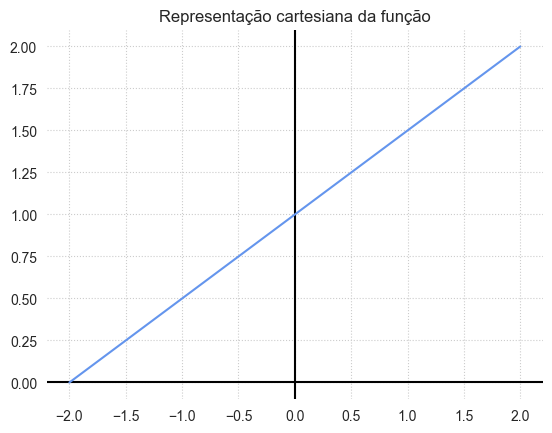

In [103]:
fig, ax = plt.subplots()

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.grid(linestyle='dotted')
ax.spines[["top","bottom","left","right"]].set_visible(False)

plot = sns.lineplot(
    x=valores_x, y=valores_y, color="cornflowerblue",ax=ax).set(
    title="Representação cartesiana da função")

In [104]:
def correlacao_pearson(x, y):
    if len(x)==len(y) and (isinstance(x, np.ndarray) and isinstance(y, np.ndarray)):
        somatoria_medias = sum((x - x.mean()) * (y - y.mean()))
        somatoria_x_quadrado = sum((x - x.mean()) ** 2)
        somatoria_y_quadrado = sum((y - y.mean()) ** 2)       
        valor_final = somatoria_medias / np.sqrt(somatoria_x_quadrado * somatoria_y_quadrado)
        return valor_final

# correlacao_pearson(np.array(valores_x),np.array(valores_y))

# np.correlate(np.array(valores_x),np.array(valores_y))

# statistics.correlation(valores_x, valores_y)

# df.corr(method="pearson")

## Modelagem da Regressão Simples

In [105]:
model_scikit = LinearRegression()
admission = pd.read_csv("Admission_Predict.csv")

# Conversão de decimal para porcentagem
admission["Chance of Admit "] = admission["Chance of Admit "] * 100

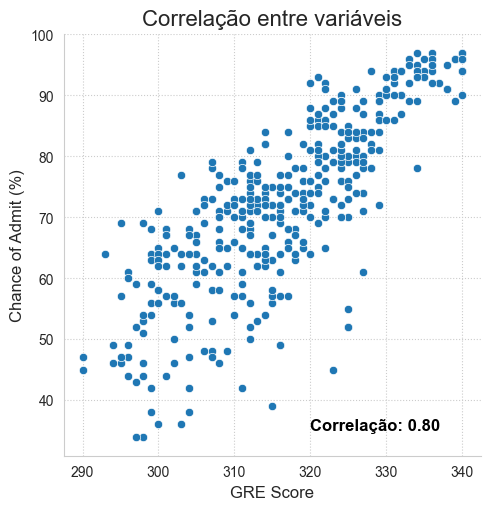

In [106]:
GRE_correlation = statistics.correlation(
    admission["GRE Score"], admission["Chance of Admit "]
)

sns.relplot(
    x=admission["GRE Score"], y=admission["Chance of Admit "]
)

plt.title('Correlação entre variáveis', fontsize=16)
plt.xlabel('GRE Score', fontsize=12)
plt.ylabel('Chance of Admit (%)', fontsize=12)

plt.text(
    x = 320, y = 35, 
    s = f"Correlação: {GRE_correlation:.2f}", 
    horizontalalignment='left', size='large', color='black', weight='bold')

plt.grid(linestyle='dotted')

In [107]:
std_dev_x = admission.std(axis=0)["GRE Score"]
std_dev_y = admission.std(axis=0)["Chance of Admit "]
reg_coef_angular = GRE_correlation * (std_dev_y / std_dev_x)

media_x = admission["GRE Score"].mean()
media_y = admission["Chance of Admit "].mean()
reg_intercepto = media_y - (reg_coef_angular * media_x)
print(f"Intercepto: {reg_intercepto:.2f} \n"
      f"Coeficiente angular: {reg_coef_angular:.2f}")

Intercepto: -243.61 
Coeficiente angular: 1.00


In [108]:
def predicao(pontuacao_GRE):
    return reg_intercepto + (pontuacao_GRE * reg_coef_angular)

# predicao(280)  # Retorna 35.71

35.71627223397326

In [109]:
#  Divisão entre colunas regressores / alvo
X = admission.drop(columns="Chance of Admit ")
Y = admission["Chance of Admit "]

#  Divisão treino / teste
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=True)

#  Reshape para compatibilidade em regressão simples
x_train_simple = x_train["GRE Score"].to_numpy().reshape((-1, 1))
x_test_simple = x_test["GRE Score"].to_numpy().reshape((-1, 1))

#  Treino e predição do modelo de regressão
model_scikit_simple = model_scikit.fit(x_train_simple, y_train)

pred = model_scikit_simple.predict(np.array(280).reshape((-1, 1)))
coeficiente_determinacao = model_scikit.score(x_test_simple, y_test)

print(f"Chance de Admissão: {pred[0]:.2f}% \n"
      f"R²: {coeficiente_determinacao:.2f}")

Chance de Admissão: 35.38% 
R²: 0.70


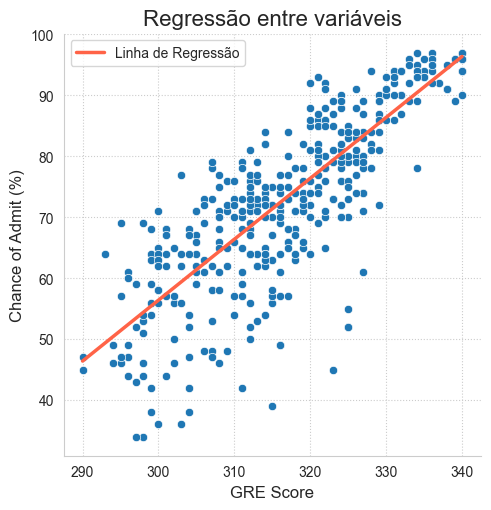

In [110]:
sns.relplot(
    x=admission["GRE Score"], y=admission["Chance of Admit "]
)

plt.title("Regressão entre variáveis", fontsize=16)
plt.xlabel("GRE Score", fontsize=12)
plt.ylabel("Chance of Admit (%)", fontsize=12)
plt.grid(linestyle="dotted")

# Conjunto de valores para traçar a linha de regressão.

x_linha = np.linspace(290, 340, 25)  # Escolhendo 25 pontos ao acaso.

# Cálculo conforme a equação obtida.
y_linha = -243.61 + 1 * x_linha

plt.plot(
    x_linha, y_linha, 
    color="tomato", label="Linha de Regressão", linewidth=2.5
)

plt.legend();

## Regressão Multipla

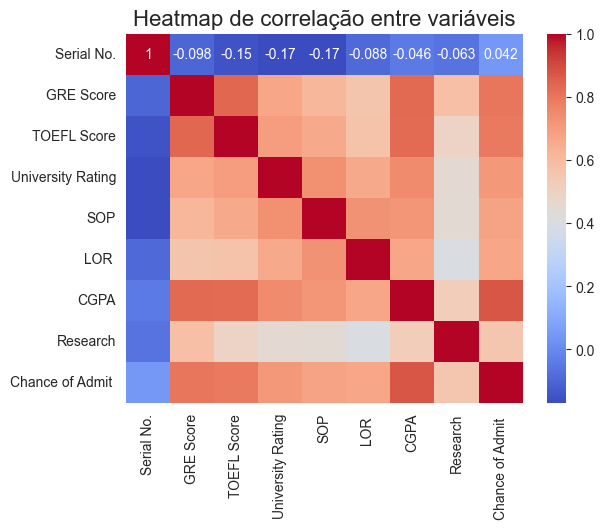

In [111]:
sns.heatmap(admission.corr(), annot=True, cmap="coolwarm")

plt.title("Heatmap de correlação entre variáveis", fontsize=16);

In [112]:
#  Vamos também reformatar o dataframe para conter apenas colunas usadas.
admission = admission[[
    "GRE Score", "TOEFL Score", "CGPA", "Chance of Admit "
]]

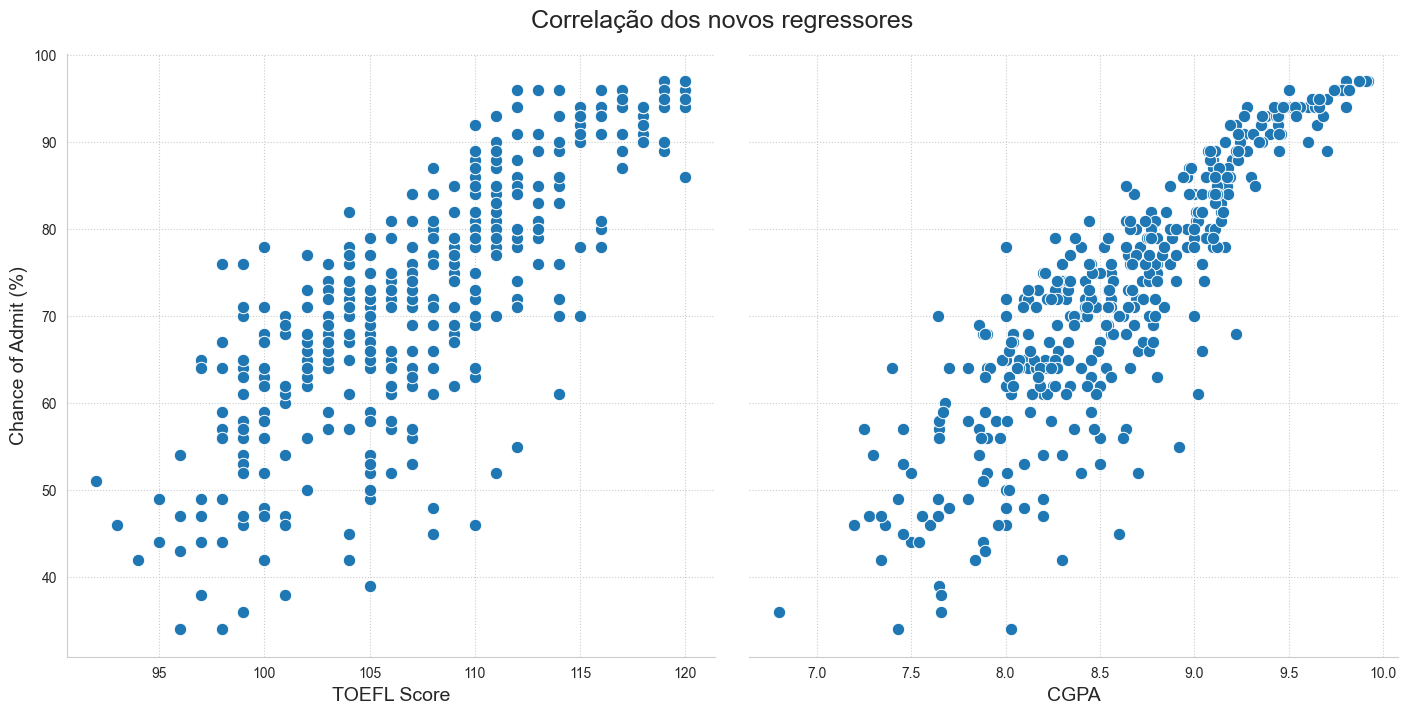

In [113]:
fig, axs = plt.subplots(figsize=(14,7), ncols=2, sharey="row")
plt.suptitle("Correlação dos novos regressores", fontsize=18)
plt.tight_layout()

#  Primeiro gráfico
axs[0].set_ylabel("Chance of Admit (%)", fontsize=14)
axs[0].set_xlabel("TOEFL Score", fontsize=14)
axs[0].grid(linestyle="dotted")
sns.despine(ax=axs[0])

sns.scatterplot(
    x=admission["TOEFL Score"], y=admission["Chance of Admit "], 
    ax=axs[0], s=80
)

# Segundo gráfico

axs[1].set_xlabel("CGPA", fontsize=14)
axs[1].grid(linestyle="dotted")
sns.despine(ax=axs[1], left=True)

sns.scatterplot(
    x=admission["CGPA"], y=admission["Chance of Admit "], 
    ax=axs[1], s=80
);

In [114]:
#  Divisão entre colunas regressores / alvo
X = admission.drop(columns="Chance of Admit ")
Y = admission["Chance of Admit "]

#  Divisão treino / teste
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=True)

In [115]:
# Usando statsmodel
model_sm = sm.OLS(y_train, x_train)
resultado = model_sm.fit()

print(resultado.summary())

                                 OLS Regression Results                                
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              7869.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                   3.33e-297
Time:                        18:33:45   Log-Likelihood:                         -1138.5
No. Observations:                 320   AIC:                                      2283.
Df Residuals:                     317   BIC:                                      2294.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [120]:
# Usando scikit-learn
model_scikit = LinearRegression()

model_scikit.fit(x_train, y_train)

# Vamos prever um aluno com altas notas em todos os testes:
pred = model_scikit.predict(np.array([330, 115, 9.6]).reshape((1, -1)))
coeficiente_determinacao = model_scikit.score(x_test, y_test)

print(f"Chance de Admissão: {pred[0]:.2f}% \n"
      f"R²: {coeficiente_determinacao:.2f}")

Chance de Admissão: 92.10% 
R²: 0.80
